In [1]:
import logging
import torch
import dgl
import random 
import numpy as np 
from dataloader import parse_args, DataLoaderHGNN
import networkx as nx
from matplotlib import pyplot as plt
import collections
train_dict = collections.defaultdict(list)
test_dict = collections.defaultdict(list)

/home/hieunt/anaconda3/envs/cfil/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [156]:
for k in train_dict.keys():
    if len(train_dict[k]) == 2:
        print(k + 24228)
        break

35638


In [ ]:

user_start = 24228

In [107]:
f = open("data/douban_movie/user_movie.dat")
text = f.read()
lines = text.split("\n")
del lines[-1]
random.shuffle(lines)

i = 0
for line in lines:
    words = line.split("\t")
    train_dict[int(words[0])].append(int(words[1]))

In [115]:
import seaborn as sns

In [147]:
((np.array(arr) >= 3).sum() + (np.array(arr) <= 400).sum() - (np.array(arr) < 3).sum() - (np.array(arr) > 400).sum() ) / 2

9369.0

In [145]:
(np.array(arr) < 400).sum()

12656

In [136]:
len(arr)

13367

<AxesSubplot: ylabel='Count'>

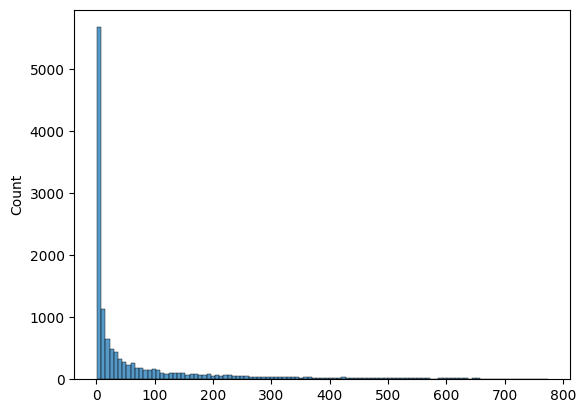

In [131]:
sns.histplot(data=arr)

In [116]:
d = sns.load_dataset("penguins")

In [117]:
d

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


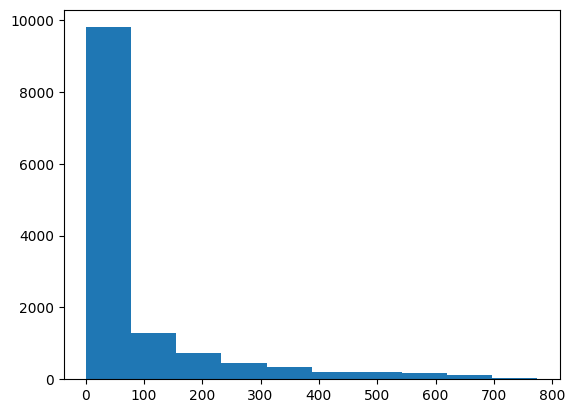

In [108]:
arr = [len(train_dict[k]) for k in train_dict.keys()]
plt.hist(arr)
plt.show()

In [2]:
def seed(random_seed):
    torch.manual_seed(random_seed)
    random.seed(random_seed)
    np.random.seed(random_seed)

def get_logger(logger_name, log_file, level=logging.INFO):
    l = logging.getLogger(logger_name)
    formatter = logging.Formatter('%(asctime)s : %(message)s', "%Y-%m-%d %H:%M:%S")
    fileHandler = logging.FileHandler(log_file, mode='a')
    fileHandler.setFormatter(formatter)

    l.setLevel(level)
    l.addHandler(fileHandler)

    return logging.getLogger(logger_name)

In [3]:
class Args:
  seed = 123
  task = 'rec'
  data_name = 'douban_movie'
  data_dir = 'data/'
  use_pretrain = 0
  pretrain_embedding_dir = 'datasets/pretrain/'
  cf_batch_size = 90000
  kg_batch_size = 10000
  nd_batch_size = 5000
  rl_batch_size = 1
  train_batch_size = 2000
  test_batch_size = 20000
  entity_dim = 64
  relation_dim = 32
  aggregation_type = 'bi-interaction'
  log = ''



In [4]:
seed(0)
args=Args()
infor = 'rl_' + str(args.data_name) + '_' + str(args.task) + '_' + str(args.log)
model_name = 'model_' + infor + '.pth'
dataset = args.data_name
logger1 = get_logger('log', 'log/logger_' + infor + '.log')
logger2 = get_logger('log2', 'log/logger2_' + infor + '.log')

In [5]:
data = DataLoaderHGNN(logger1, args, dataset)

In [6]:
import networkx

### Create subgraph with following path
U -> M -> A -> M
It corresponds to 3 relation types: 2 -> 3 -> 8

In [9]:
data.kg_train_data[data.kg_train_data['ht'] == 5][data.kg_train_data['h'] == 35637]

/tmp/ipykernel_128533/78102389.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.kg_train_data[data.kg_train_data['ht'] == 5][data.kg_train_data['h'] == 35637]


,h,r,t,ht,tt
76313,35637,6,21486,5,4
85419,35637,6,21534,5,4
94854,35637,6,21591,5,4
107403,35637,6,21675,5,4
120696,35637,6,21767,5,4
160723,35637,6,22070,5,4
183442,35637,6,22228,5,4
193375,35637,6,22282,5,4
291877,35637,6,22751,5,4
309636,35637,6,22812,5,4


In [197]:
g = dgl.out_subgraph(data.train_graph, {'n5': [35637-24228]})
g

Graph(num_nodes={'n0': 12677, 'n1': 6311, 'n2': 2449, 'n3': 38, 'n4': 2753, 'n5': 13367},
      num_edges={('n0', '1', 'n5'): 0, ('n0', '3', 'n1'): 0, ('n0', '4', 'n2'): 0, ('n0', '5', 'n3'): 0, ('n1', '8', 'n0'): 0, ('n2', '9', 'n0'): 0, ('n3', '10', 'n0'): 0, ('n4', '11', 'n5'): 0, ('n5', '12', 'n5'): 0, ('n5', '2', 'n0'): 2, ('n5', '6', 'n4'): 23, ('n5', '7', 'n5'): 0},
      metagraph=[('n0', 'n5', '1'), ('n0', 'n1', '3'), ('n0', 'n2', '4'), ('n0', 'n3', '5'), ('n5', 'n5', '12'), ('n5', 'n5', '7'), ('n5', 'n0', '2'), ('n5', 'n4', '6'), ('n1', 'n0', '8'), ('n2', 'n0', '9'), ('n3', 'n0', '10'), ('n4', 'n5', '11')])

In [170]:
sgraph = data.train_graph.node_type_subgraph(['n0', 'n5', 'n1'])
sgraph = sgraph.edge_type_subgraph(['2', '3', '8'])

sgraph

Graph(num_nodes={'n0': 12677, 'n1': 6311, 'n5': 13367},
      num_edges={('n5', '2', 'n0'): 855123, ('n0', '3', 'n1'): 33572, ('n1', '8', 'n0'): 33572},
      metagraph=[('n0', 'n1', '3'), ('n1', 'n0', '8'), ('n5', 'n0', '2')])

In [6]:
data.train_graph

Graph(num_nodes={'n0': 12677, 'n0.1': 12677, 'n1': 6311, 'n2': 2449, 'n3': 38, 'n4': 2753, 'n5': 13367},
      num_edges={('n0', '1', 'n5'): 855123, ('n0', '3', 'n1'): 33572, ('n0', '4', 'n2'): 11276, ('n0', '5', 'n3'): 27668, ('n1', '8', 'n0.1'): 33572, ('n2', '9', 'n0.1'): 11276, ('n3', '10', 'n0.1'): 27668, ('n4', '11', 'n5'): 570047, ('n5', '12', 'n5'): 4085, ('n5', '2', 'n0'): 855123, ('n5', '6', 'n4'): 570047, ('n5', '7', 'n5'): 4085},
      metagraph=[('n0', 'n5', '1'), ('n0', 'n1', '3'), ('n0', 'n2', '4'), ('n0', 'n3', '5'), ('n5', 'n5', '12'), ('n5', 'n5', '7'), ('n5', 'n0', '2'), ('n5', 'n4', '6'), ('n1', 'n0.1', '8'), ('n2', 'n0.1', '9'), ('n3', 'n0.1', '10'), ('n4', 'n5', '11')])

In [10]:
sgraph = data.train_graph.node_type_subgraph(['n0', 'n5', 'n1', 'n0.1'])
sgraph = sgraph.edge_type_subgraph(['2', '3', '8'])
sgraph = sgraph.khop_out_subgraph({'n5': 35637 - 24228}, k=3)

sgraph

(Graph(num_nodes={'n0': 2, 'n0.1': 45, 'n1': 7, 'n5': 1},
       num_edges={('n5', '2', 'n0'): 2, ('n0', '3', 'n1'): 7, ('n1', '8', 'n0.1'): 52},
       metagraph=[('n0', 'n1', '3'), ('n1', 'n0.1', '8'), ('n5', 'n0', '2')]),
 {'n5': tensor([0])})

(-0.27069660103849863,
 1.120744925890536,
 -0.3446988099744437,
 0.28677800712381774)

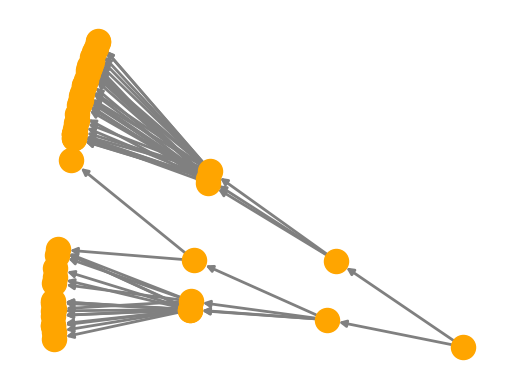

In [11]:
homo_graph = dgl.to_homogeneous(sgraph[0])
homo_graph = dgl.to_networkx(homo_graph)
nodelist = list(homo_graph.nodes())
edgelist = list(homo_graph.edges())
pos = nx.kamada_kawai_layout(homo_graph)
pos_nodelist = {k: v for k, v in pos.items() if k in nodelist}
nx.draw_networkx_nodes(homo_graph, pos,
                               nodelist=list(homo_graph.nodes()),
                               node_color='#FFA500',
                               node_size=300, label = np.arange(len(nodelist)))

nx.draw_networkx_edges(homo_graph, pos, width=2, edge_color='gray', arrows=True)

plt.axis('off')

In [94]:
len(homo_graph.edges)

22

Graph(num_nodes={'n0': 10, 'n1': 10, 'n5': 0},
      num_edges={('n5', '2', 'n0'): 0, ('n0', '3', 'n1'): 0, ('n1', '8', 'n0'): 0},
      metagraph=[('n0', 'n1', '3'), ('n1', 'n0', '8'), ('n5', 'n0', '2')])

In [52]:
sgraph.nodes('n0')

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

In [49]:
from matplotlib import pyplot as plt 
import networkx as nx

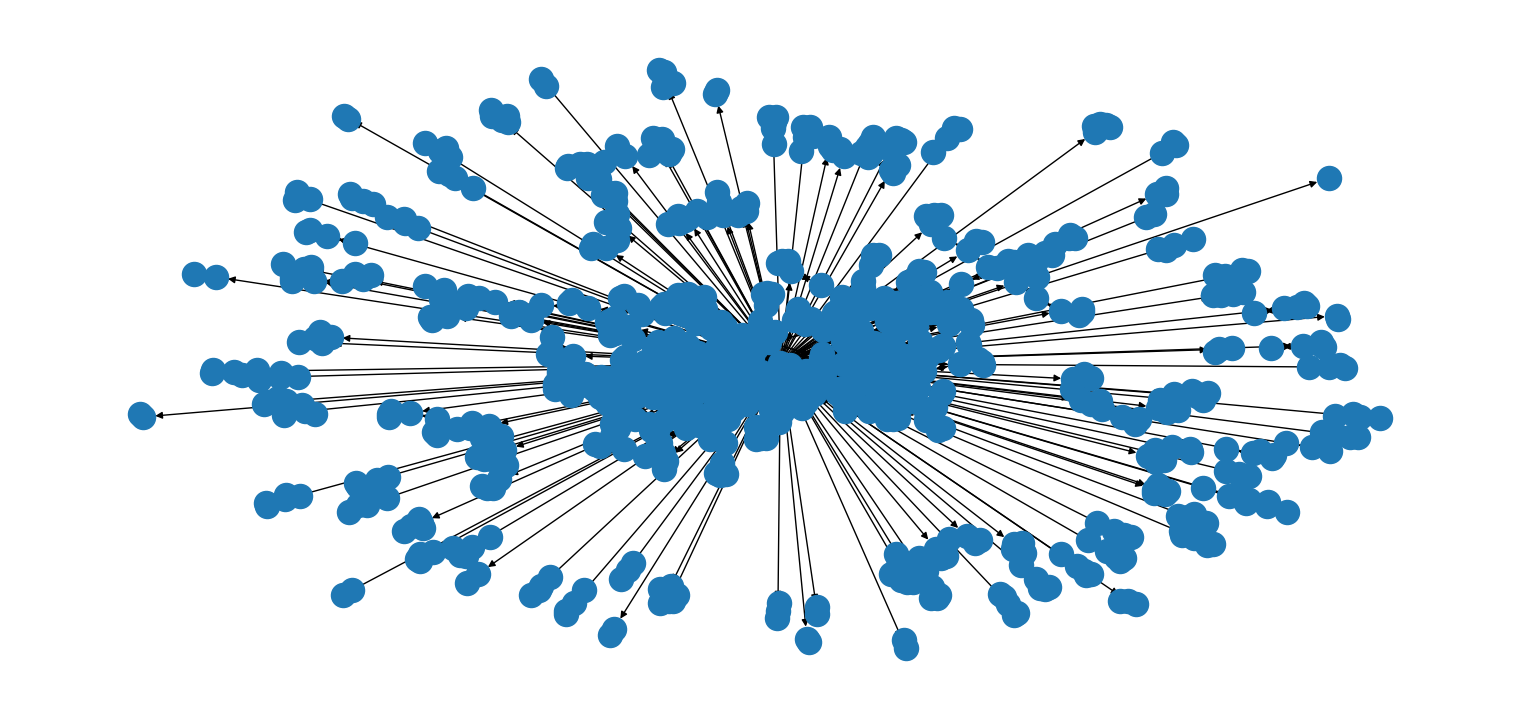

In [50]:
homo_graph = dgl.to_homogeneous(sgraph)
homo_graph = dgl.to_networkx(homo_graph)
plt.figure(figsize=[15,7])
nx.draw(homo_graph)

In [15]:
sgraph = dgl.metapath_reachable_graph(data.train_graph, ['2', '3', '8'])


Graph(num_nodes={'n0': 12677, 'n5': 13367},
      num_edges={('n5', '_E', 'n0'): 17233029},
      metagraph=[('n5', 'n0', '_E')])

In [16]:
sgraph = dgl.out_subgraph(data.train_graph, {'n5': [123]})
sgraph

Graph(num_nodes={'n0': 12677, 'n1': 6311, 'n2': 2449, 'n3': 38, 'n4': 2753, 'n5': 13367},
      num_edges={('n0', '1', 'n5'): 0, ('n0', '3', 'n1'): 0, ('n0', '4', 'n2'): 0, ('n0', '5', 'n3'): 0, ('n1', '8', 'n0'): 0, ('n2', '9', 'n0'): 0, ('n3', '10', 'n0'): 0, ('n4', '11', 'n5'): 0, ('n5', '12', 'n5'): 1, ('n5', '2', 'n0'): 245, ('n5', '6', 'n4'): 116, ('n5', '7', 'n5'): 1},
      metagraph=[('n0', 'n5', '1'), ('n0', 'n1', '3'), ('n0', 'n2', '4'), ('n0', 'n3', '5'), ('n5', 'n5', '12'), ('n5', 'n5', '7'), ('n5', 'n0', '2'), ('n5', 'n4', '6'), ('n1', 'n0', '8'), ('n2', 'n0', '9'), ('n3', 'n0', '10'), ('n4', 'n5', '11')])

In [47]:
sgraph = dgl.out_subgraph(data.train_graph, {'n5': [6079]})
sgraph

Graph(num_nodes={'n0': 12677, 'n1': 6311, 'n2': 2449, 'n3': 38, 'n4': 2753, 'n5': 13367},
      num_edges={('n0', '1', 'n5'): 0, ('n0', '3', 'n1'): 0, ('n0', '4', 'n2'): 0, ('n0', '5', 'n3'): 0, ('n1', '8', 'n0'): 0, ('n2', '9', 'n0'): 0, ('n3', '10', 'n0'): 0, ('n4', '11', 'n5'): 0, ('n5', '12', 'n5'): 0, ('n5', '2', 'n0'): 232, ('n5', '6', 'n4'): 3, ('n5', '7', 'n5'): 0},
      metagraph=[('n0', 'n5', '1'), ('n0', 'n1', '3'), ('n0', 'n2', '4'), ('n0', 'n3', '5'), ('n5', 'n5', '12'), ('n5', 'n5', '7'), ('n5', 'n0', '2'), ('n5', 'n4', '6'), ('n1', 'n0', '8'), ('n2', 'n0', '9'), ('n3', 'n0', '10'), ('n4', 'n5', '11')])

In [87]:
sgraph = dgl.edge_type_subgraph(data.train_graph, [
    ('n5', '2', 'n0'), ('n0', '3', 'n1'), ('n1', '8', 'n0')
])
sgraph = dgl.khop_out_subgraph(sgraph, {'n5': [6076]}, k = 2)

sgraph

(Graph(num_nodes={'n0': 7, 'n1': 18, 'n5': 1},
       num_edges={('n5', '2', 'n0'): 7, ('n0', '3', 'n1'): 22, ('n1', '8', 'n0'): 22},
       metagraph=[('n0', 'n1', '3'), ('n1', 'n0', '8'), ('n5', 'n0', '2')]),
 {'n5': tensor([0])})

In [60]:
sgraph[0]

Graph(num_nodes={'n0': 232, 'n1': 541, 'n5': 1},
      num_edges={('n5', '2', 'n0'): 232, ('n0', '3', 'n1'): 857, ('n1', '8', 'n0'): 857},
      metagraph=[('n0', 'n1', '3'), ('n1', 'n0', '8'), ('n5', 'n0', '2')])

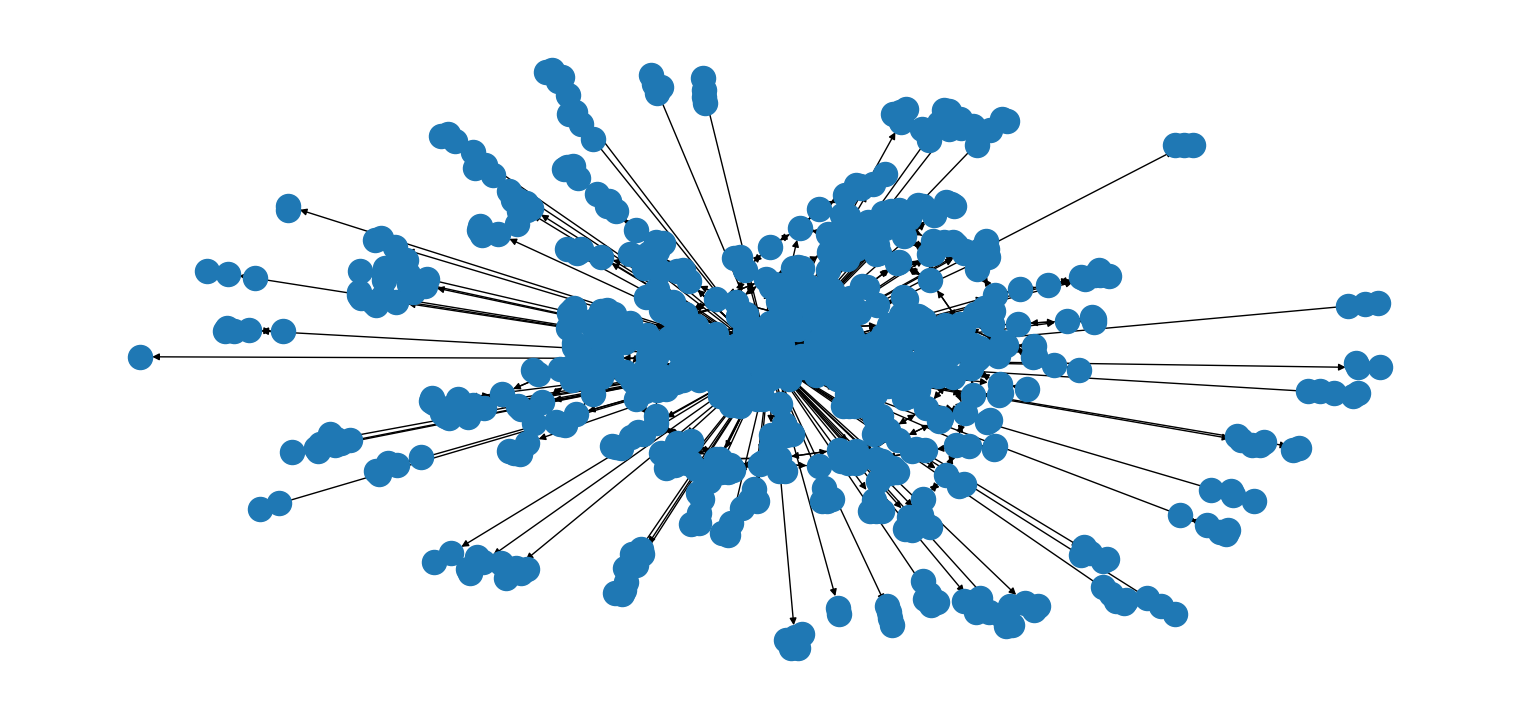

In [67]:
sgraph = dgl.edge_type_subgraph(data.train_graph, [
    ('n5', '2', 'n0'), ('n0', '3', 'n1'), ('n1', '8', 'n0')
])
sgraph = dgl.khop_out_subgraph(sgraph, {'n5': [6079]}, k = 2)

homo_graph = dgl.to_homogeneous(sgraph[0])
homo_graph = dgl.to_networkx(homo_graph)
plt.figure(figsize=[15,7])
nx.draw(homo_graph)

In [54]:
sub_graph = dgl.edge_type_subgraph(data.train_graph, [
    ('n5', '2', 'n0'), ('n0', '3', 'n1'), ('n1', '8', 'n0')
])
sub_graph

Graph(num_nodes={'n0': 12677, 'n1': 6311, 'n5': 13367},
      num_edges={('n5', '2', 'n0'): 855123, ('n0', '3', 'n1'): 33572, ('n1', '8', 'n0'): 33572},
      metagraph=[('n0', 'n1', '3'), ('n1', 'n0', '8'), ('n5', 'n0', '2')])

In [44]:
sub_graph

Graph(num_nodes={'n0': 12677, 'n1': 6311, 'n5': 13367},
      num_edges={('n5', '2', 'n0'): 855123, ('n0', '3', 'n1'): 33572, ('n1', '8', 'n0'): 33572},
      metagraph=[('n0', 'n1', '3'), ('n1', 'n0', '8'), ('n5', 'n0', '2')])

In [51]:
data.train_graph

Graph(num_nodes={'n0': 12677, 'n1': 6311, 'n2': 2449, 'n3': 38, 'n4': 2753, 'n5': 13367},
      num_edges={('n0', '1', 'n5'): 855123, ('n0', '3', 'n1'): 33572, ('n0', '4', 'n2'): 11276, ('n0', '5', 'n3'): 27668, ('n1', '8', 'n0'): 33572, ('n2', '9', 'n0'): 11276, ('n3', '10', 'n0'): 27668, ('n4', '11', 'n5'): 570047, ('n5', '12', 'n5'): 4085, ('n5', '2', 'n0'): 855123, ('n5', '6', 'n4'): 570047, ('n5', '7', 'n5'): 4085},
      metagraph=[('n0', 'n5', '1'), ('n0', 'n1', '3'), ('n0', 'n2', '4'), ('n0', 'n3', '5'), ('n5', 'n5', '12'), ('n5', 'n5', '7'), ('n5', 'n0', '2'), ('n5', 'n4', '6'), ('n1', 'n0', '8'), ('n2', 'n0', '9'), ('n3', 'n0', '10'), ('n4', 'n5', '11')])

### Douban Movie
- n0: Movie = n_items   = 13367
- n1: Actor             = 6311
- n2: Director          = 2449
- n3: Type              = 38
- n4: Group             = 2753
- n5: User = n_users    = 12677

In [ ]:
def get_next_node_list():